# 1.0 Introduction
Chicago is third largest city in the United States with a population of around 2.7 million people. It is well known for its incredible architecture, deep history and scenic skylines. Chicago also appears to be renowned for its crime with one of the top Google Search prompts being ‘is Chicago unsafe’ followed by variations of the same topic.

<div style="text-align: center;" markdown="1">
    <figure>
<img src="Images/GoogleSearch_Chicago.png" width="400">
  <figcaption>Screencap from Google search form, taken October 8 at 6:43pm MDT.</figcaption>
    </figure>
</div>



Detailed crime data provided by the [City of Chicago](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/about_data) is open for public consumption and provides a unique opportunity for our team to dive deep into the numbers and attempt to decode the patterns of the crime in Chicago.

Our project focuses on implementing our new skills in data science and analysis to explore the guiding questions as outlined below. Our goal is to provide the general consumer more impactful, meaningful answers to the guiding questions through visualizations and to provide information where possible on any trends discovered.
 
Discovering trends and current metrics for Chicago could also provide a baseline to be used as comparisons to other cities in North America, including Toronto (which is of comparable size) or elsewhere in the world. 


# 2.0 Dataset
Our underlying dataset is Crimes - 2001 to Present available on the [City of Chicago Data Portal](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/about_data).

According to their website: _“The open data portal is required under an Executive Order signed by Mayor Rahm Emanuel on December 10, 2012.” and allows users to “find city data … find facts about your neighborhood … create maps and graphs about the city … freely download the data for your own analysis”_.

A full disclaimer of liability, terms of use, reservation of rights and indemnity are on th [City of Chicago website]((https://www.chicago.gov/city/en/narr/foia/data_disclaimer.html). 
Wwe are required to include the specified disclaimer verbiage if making our analysis available for wider se
.
From this overarching dataset, we will filter the data to only include crimes where the “Year” field is greater than or equal to 2019. This subset will then be exported in CSV format. The dataset is in a structured format - most cleaning worwasen completed by the database administrat. Dadata cleaning requirementfor the projectd were e limited beyond potentially removing observations with missing valu, outliers, or other items - listed cleaning section below.The initial dataset had over 8 million observations (8,159,650). After applying the above noted year filter this was reduced to about 1.3 million (1,367,050). There are 22 attributes available. The attributes most likely to be of interest to us are listed in **bold** below:

- ID (integer)
- Case Number (string)
- **Date** (date/time)
- **Block** (string)
- IUCR (state level index - string)
- **Primary Type** (categorical)
- **Description** (string)
- **Location Description** (string)
- **Arrest** (Boolean)
- **Domestic** (Boolean)
- **Beat** (integer)
- **District** (integer)
- **Ward** (integer)
- Community Area (integer)
- FBI Code (string)
- **X Coordinate** (integer)
- **Y Coordinate** (integer)
- **Year** (integer)
- Updated On (date/time)
- **Latitude** (float)
- **Longitude** (float)
- Location (tup)le

The dataset for this project was too large to zip and load to dropbox. The CSV filewere shared in a One Drive location - https://uofc-my.sharepoint.com/:f:/r/personal/margarita_gakis1_ucalgary_ca/Documents/Datasets?csf=1&web=1&e=8TB04r.                                                                                                                                                                                                                                                                                       

# 3.0 Guiding questions 
There are four main questions that our team worked through on this project.
## 3.1 Time Breakdown:
 - It is a common belief that more crime is happening at night. It is a correct conviction or is it a delusion?
 - What other time factors can be examined?

The main idea behind this question is to understand whether the time of day, day of the week or season can show when a crime is likely to happen. This will help to understand general crime patterns and how those are influenced by the time. This data would not only prove or turn common beliefs upside-down, but might also be very useful for law enforcement while allocating the resources and distributing them across the city.  

# Data Loading and Cleaning 

First install all the required libraries for data cleaning, Transformation, and visualization. 


In [3]:
import numpy as np
import pandas as pd
import matplotlib as  mpl
import matplotlib.pyplot as plt
import plotly.express as px

### Loading all the required CSV file on Jupiter notebook.

In [5]:
df_19=pd.read_csv('Crimes_2019.csv')
df_20=pd.read_csv('Crimes_2020.csv')
df_21=pd.read_csv('Crimes_2021.csv')
df_22=pd.read_csv('Crimes_2022.csv')
df_23=pd.read_csv('Crimes_2023.csv')
# Converting all the Files into Pandas Datafranmes 
df_19=pd.DataFrame(df_19)
df_20=pd.DataFrame(df_20)
df_21=pd.DataFrame(df_21)
df_22=pd.DataFrame(df_22)
df_23=pd.DataFrame(df_23)

# To see all the columns when applying head() method 
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False) 

#### Combing all 5 files (one for each year)  into one pandas DataFrame
Named the file as **df** 


In [7]:
df=pd.concat([df_19,df_20,df_21,df_22,df_23],ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185422 entries, 0 to 1185421
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ID                    1185422 non-null  int64  
 1   Case Number           1185422 non-null  object 
 2   Date                  1185422 non-null  object 
 3   Block                 1185422 non-null  object 
 4   IUCR                  1185422 non-null  object 
 5   Primary Type          1185422 non-null  object 
 6   Description           1185422 non-null  object 
 7   Location Description  1178742 non-null  object 
 8   Arrest                1185422 non-null  bool   
 9   Domestic              1185422 non-null  bool   
 10  Beat                  1185422 non-null  int64  
 11  District              1185422 non-null  int64  
 12  Ward                  1185374 non-null  float64
 13  Community Area        1185420 non-null  float64
 14  FBI Code              1185422 non-

### Convert all the columns into suitable Data Type 
All the columns have the correct data type except the `Date` column.

In [9]:
# Converting the "Date" column into datetime data type

df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df['Updated On'] = pd.to_datetime(df['Updated On'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

**Some other columns like `Community Area` and `Ward` that are flot data type can be converted to integers for easy anaylsis.**

In [11]:
col_to_int=['Community Area','Ward']
for col in col_to_int:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')

In [12]:
# Sorting the DataFrame according to Date column 
df= df.sort_values(by='Date', na_position='last') # Sorting the DataFrame according to Date column 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1185422 entries, 261102 to 1008509
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   ID                    1185422 non-null  int64         
 1   Case Number           1185422 non-null  object        
 2   Date                  1185422 non-null  datetime64[ns]
 3   Block                 1185422 non-null  object        
 4   IUCR                  1185422 non-null  object        
 5   Primary Type          1185422 non-null  object        
 6   Description           1185422 non-null  object        
 7   Location Description  1178742 non-null  object        
 8   Arrest                1185422 non-null  bool          
 9   Domestic              1185422 non-null  bool          
 10  Beat                  1185422 non-null  int64         
 11  District              1185422 non-null  int64         
 12  Ward                  1185374 non-null  In

### Dropping Columns not related to Guiding Questions.

According to Four Guiding Questions mentioned above for this project we do NOT need all the columns for the analysis. The list of columns that can be dropped is `X Coordinate`, `Y Coordinate`, `IUCR`,` Case Number`,`ID`, and ` Community Area`.Removing unnecessary columns from the original data set reduces the size of the data, leading to faster operations. 

In [14]:
df.drop(['X Coordinate', 'Y Coordinate','IUCR','Case Number','ID','Community Area'], axis=1, inplace=True)

There is one column `Location` which contains duplicate information found in the `Latitude` and `Longitude` columns. Not sure if all the rows have duplicate values and if dropping the `Location` column can cause a loss of data. For this, a test can done on these columns.

In [16]:
# Splitting the Location column into two columns based on special characters.  

df['Location_Latitude'] = df['Location'].str.extract(r'\(([^,]+),')[0].astype(float)
df['Location_Longitude'] = df['Location'].str.extract(r', ([^)]+)\)')[0].astype(float)

In [17]:
# Identify rows where the values in Latitude, and Longitude NOT match with Location values by creating 2 masks.

mask1 = (df['Latitude'] == df['Location_Latitude']) | (df['Latitude'].isna() & df['Location_Latitude'].isna())
mask2 = (df['Longitude'] == df['Location_Longitude']) | (df['Longitude'].isna() & df['Location_Longitude'].isna())
print(mask1.unique(),mask2.unique())


[ True] [ True]


This shows that all the values in the `Latitude` & `Longitude` columns are the same as in column `Location`.  
**So we can drop the `Location` column from our original dataset without losing any data.**

In [19]:
df.drop(['Location','Location_Latitude','Location_Longitude','Year'], axis=1, inplace=True)

#### Total NULL values in 'Latitude', 'Longitude' columns
For one of the guiding questions, we need the 'Latitude' and 'Longitude' columns to be consistent, meaning if one has a null value, the other column in the same row should also have a null value. To check if we need to drop any rows from our dataset where one column has a null value and the other does not, the following test can be performed.

In [21]:
# Check if 'Latitude' and 'Longitude' are consistent with each other
mask = (df['Latitude'].isnull() & df['Longitude'].notnull()) | (df['Longitude'].isnull() & df['Latitude'].notnull())

# Print the index where the condition is True
print(df[mask].index)



Index([], dtype='int64')


**As the above test results showed, there are NO inconsistencies  between `Latitude`, `Longitude` columns.**

In [94]:
# This is how our Data Frame looks like now.
df.head(3)

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,FBI Code,Updated On,Latitude,Longitude,Date_only,Time_only,Hour
261102,2019-01-01,012XX W JACKSON BLVD,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1231,12,28,26,2021-08-19 15:49:47,NaN,NaN,01/01/2019,00:00:00,0
196770,2019-01-01,070XX S CALUMET AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,322,3,6,11,2019-08-28 15:41:03,41.767004,-87.616904,01/01/2019,00:00:00,0
7233,2019-01-01,047XX N RACINE AVE,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,OTHER,False,False,1913,19,46,02,2019-01-10 15:16:50,41.968463,-87.659670,01/01/2019,00:00:00,0


### Important Note:
The above Pandas DataFrame, named `df`, is used as the initial DataFrame for all the guiding questions. We realized each guiding question requires its own data transformation and cleaning. So, this is the end of data cleaning but not the end of data transformation.

## Guiding Question 

The Guiding question **Is there a correlation between the crime rate of the city of Chicago and the time of year or day?**. The time window we have selected for this analysis is from January 1st, 2019 to December 31, 2023. We are interested in any trends or patterns between the seasons of the year and the crime rate.

One more thing we are interested in is to analyze **what time of the day is safe.** Mostly people imagine that daytime is safe compared to night. Is that TRUE?  

Let's first explore the data before diving into the guiding question. One way to do that is to count the frequency of unique values for the 'objects' data type columns. The columns specifically we are interested are `Primary Type`,`Arrest`, and `Domestic`. 

In [90]:
df.head(2)

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,FBI Code,Updated On,Latitude,Longitude,Date_only,Time_only,Hour
261102,2019-01-01,012XX W JACKSON BLVD,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1231,12,28,26,2021-08-19 15:49:47,NaN,NaN,01/01/2019,00:00:00,0
196770,2019-01-01,070XX S CALUMET AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,322,3,6,11,2019-08-28 15:41:03,41.767004,-87.616904,01/01/2019,00:00:00,0


In [106]:
un={}

# All the column with object data type 
columns=['Block','Primary Type','Arrest','Domestic','District', 'Ward', 'FBI Code'] 
for col in columns:
    un[col]=df[col].value_counts()   # count the unique values in each column 
    print(f'{col}\n----------------')
    print(un[col])



Block
----------------
Block
001XX N STATE ST             3384
0000X W TERMINAL ST          2261
0000X N STATE ST             1363
100XX W OHARE ST             1363
033XX W FILLMORE ST          1301
                             ... 
008XX W Chicago Ave             1
105XX S CHICAGO SKYWAY IB       1
028XX W 74TH ST                 1
016XX W Olive Ave               1
062XX N Kenmore Ave             1
Name: count, Length: 35763, dtype: int64
Primary Type
----------------
Primary Type
THEFT                                256975
BATTERY                              216660
CRIMINAL DAMAGE                      133985
ASSAULT                              102649
DECEPTIVE PRACTICE                    89330
MOTOR VEHICLE THEFT                   80252
OTHER OFFENSE                         73644
ROBBERY                               43785
WEAPONS VIOLATION                     41137
BURGLARY                              40135
NARCOTICS                             38196
CRIMINAL TRESPASS            

Lets explore `Primary Type` column using bar graph to see what cirme types were committed the most during 2019 to 2023. 


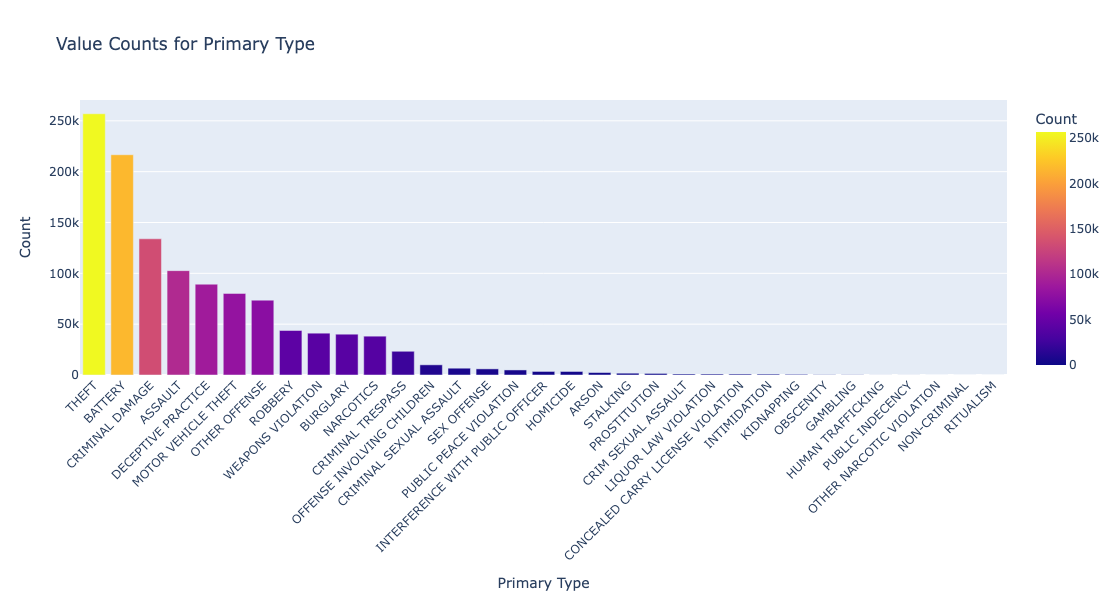

In [116]:
# Unique value counts for 'Primary Type'
primary_type_counts = df['Primary Type'].value_counts().reset_index()
primary_type_counts.columns = ['Primary Type', 'Count']  # Rename columns for clarity

# Create a bar plot for 'Primary Type'
fig = px.bar(primary_type_counts, x='Primary Type', y='Count', 
             title='Value Counts for Primary Type', labels={'Primary Type': 'Primary Type', 'Count': 'Count'},
             color='Count', color_continuous_scale=px.colors.sequential.Plasma)

# layout of graph
fig.update_layout(xaxis_title='Primary Type', yaxis_title='Count', xaxis_tickangle=-45,
    width=1000,height=600   
)

fig.show()

![title](1st.png)

### Observations: 
The top 4 crimes committed in a 5-year time window in Chicago are **THEFT, BATTERY, CRIMANL DAMAGE, ASSAULT**. Crimes like RITUALISM, HUMAN TRAFFICKING, KIDNAPPING, INTIMIDATION, and GAMBLING are very low in numbers but these are the crimes that were reported. 
#### Important Note: 
We CANNOT assume that this data set to represents the full picture or depicts the complete ground reality.

## Crime rate Relationshipe with time of the YEAR. 

So in order to see the crime rate relationshipe with time of the year we are implimenting **Rolling Average**  after dividing the data set into yearly data sets. 

In [120]:
# Masks to get data according to each year 
mask_2019=df[df['Date'].dt.year==2019]
mask_2020=df[df['Date'].dt.year==2020]
mask_2021=df[df['Date'].dt.year==2021]
mask_2022=df[df['Date'].dt.year==2022]
mask_2023=df[df['Date'].dt.year==2023]

For this part, we selected **5 days as the time window** and counted the number of crimes committed during that period. Created new DataFrames for each year with a column containing the number of crimes committed in a 5-day time period.

In [125]:
# Create the new data sets for each year 2021
crime_count_2021=mask_2021.groupby(pd.Grouper(key='Date', freq='5D')).size()  # Group by 5-day intervals and count the number of crimes
crime_count_2021 = crime_count_2021.reset_index(name='count')                 # Renaming index
crime_count_2021['Date_plus_5'] = crime_count_2021['Date'] + pd.Timedelta(days=5)    # Adding a new column showcasing the end date
arange_columns=['Date','Date_plus_5','count']                                         # Rearanging Columns 
crime_count_2021=crime_count_2021[arange_columns]                    
crime_count_2021.rename(columns={'Date':'Start_Date','Date_plus_5':'End_date'},inplace=True)    # Renaming Columns


# Create the new data sets for each year 2020
crime_count_2020=mask_2020.groupby(pd.Grouper(key='Date', freq='5D')).size() # Group by 5-day intervals and count the number of crimes
crime_count_2020 = crime_count_2020.reset_index(name='count')
crime_count_2020['Date_plus_5'] = crime_count_2020['Date'] + pd.Timedelta(days=5)
arange_columns=['Date','Date_plus_5','count']
crime_count_2020=crime_count_2020[arange_columns]
crime_count_2020.rename(columns={'Date':'Start_Date','Date_plus_5':'End_date'},inplace=True)

# Create the new data sets for each year 2019 
crime_count_2019=mask_2019.groupby(pd.Grouper(key='Date', freq='5D')).size()
crime_count_2019 = crime_count_2019.reset_index(name='count')
crime_count_2019['Date_plus_5'] = crime_count_2019['Date'] + pd.Timedelta(days=5)
arange_columns=['Date','Date_plus_5','count']
crime_count_2019=crime_count_2019[arange_columns]
crime_count_2019.rename(columns={'Date':'Start_Date','Date_plus_5':'End_date'},inplace=True)


# Create the new data sets for each year 2022 
crime_count_2022=mask_2022.groupby(pd.Grouper(key='Date', freq='5D')).size()
crime_count_2022 = crime_count_2022.reset_index(name='count')
crime_count_2022['Date_plus_5'] = crime_count_2022['Date'] + pd.Timedelta(days=5)
arange_columns=['Date','Date_plus_5','count']
crime_count_2022=crime_count_2022[arange_columns]
crime_count_2022.rename(columns={'Date':'Start_Date','Date_plus_5':'End_date'},inplace=True)


# Create the new data sets for each year 2023 
crime_count_2023=mask_2023.groupby(pd.Grouper(key='Date', freq='5D')).size()  
crime_count_2023 = crime_count_2023.reset_index(name='count')
crime_count_2023['Date_plus_5'] = crime_count_2023['Date'] + pd.Timedelta(days=5)
arange_columns=['Date','Date_plus_5','count']
crime_count_2023=crime_count_2023[arange_columns]
crime_count_2023.rename(columns={'Date':'Start_Date','Date_plus_5':'End_date'},inplace=True)
crime_count_2023.head()

,Start_Date,End_date,count
0,2023-01-01,2023-01-06,3798
1,2023-01-06,2023-01-11,3392
2,2023-01-11,2023-01-16,3660
3,2023-01-16,2023-01-21,3483
4,2023-01-21,2023-01-26,3308


### Reference: "stackoverflow"  For grouping it with 5 Days. 
Title: Pandas Groupby using time-frequency    
Last Updated: 6 years ago  
Link: https://stackoverflow.com/questions/52489702/pandas-groupby-using-time-frequency

So, now i am using **Rolling average** to see trends 


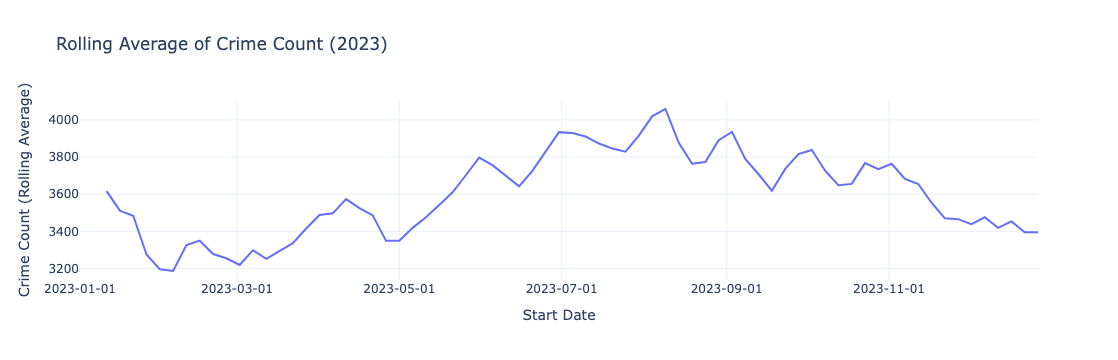

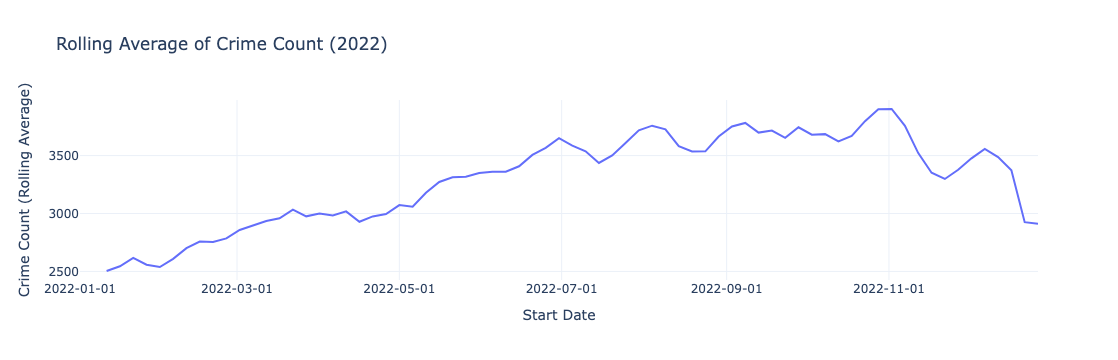

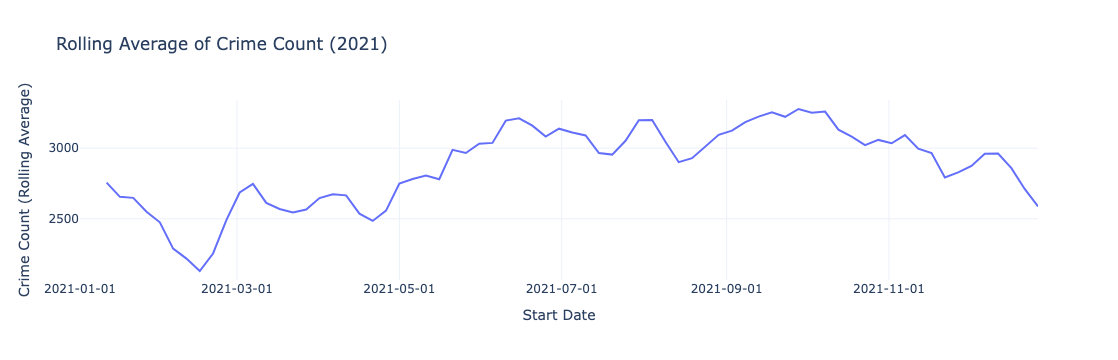

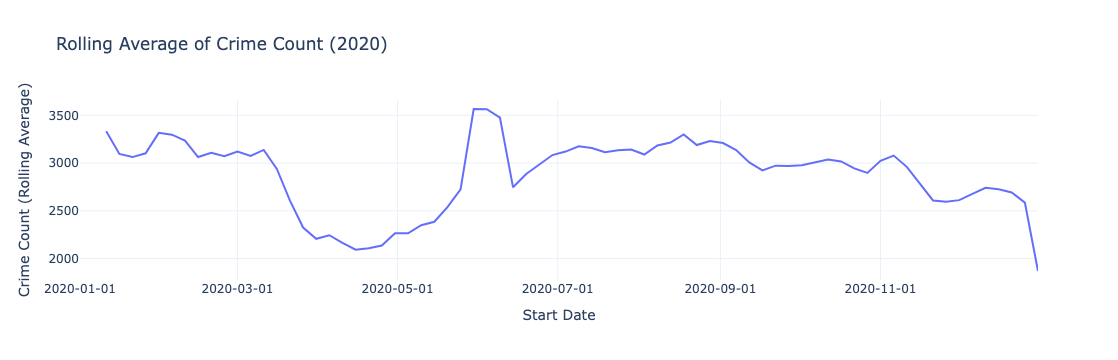

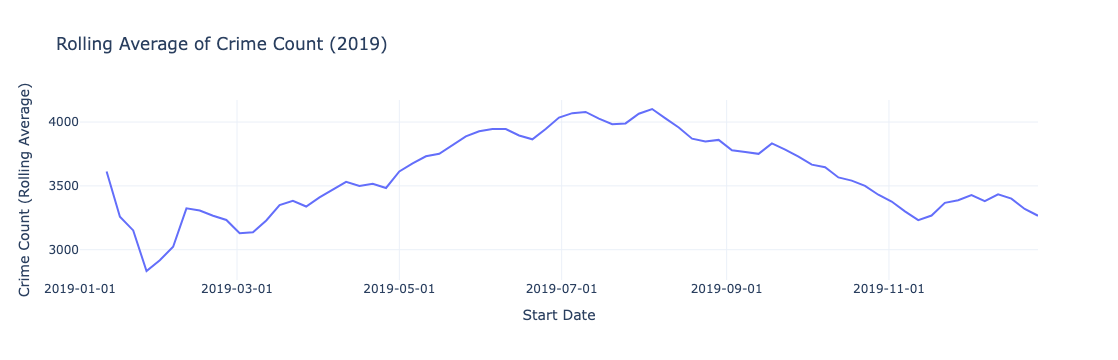

In [144]:

# Calculate the rolling average of the 'count' column (e.g., with a window of 3)
crime_count_2023['Rolling_Avg'] = crime_count_2023['count'].rolling(window=3).mean()
crime_count_2022['Rolling_Avg'] = crime_count_2022['count'].rolling(window=3).mean()
crime_count_2021['Rolling_Avg'] = crime_count_2021['count'].rolling(window=3).mean()
crime_count_2020['Rolling_Avg'] = crime_count_2020['count'].rolling(window=3).mean()
crime_count_2019['Rolling_Avg'] = crime_count_2019['count'].rolling(window=3).mean()

# Create the plot 
fig = px.line(crime_count_2023, x='Start_Date', y='Rolling_Avg', title='Rolling Average of Crime Count (2023)',
              labels={'Start_Date': 'Start Date', 'Rolling_Avg': 'Crime Count (Rolling Average)'})

# Customize the layout 
fig.update_layout(xaxis_title='Start Date',yaxis_title='Crime Count (Rolling Average)',xaxis=dict(tickformat='%Y-%m-%d'),
    template='plotly_white',hovermode="x unified"  # This makes hover display more readable
)
fig.show()




# Create the plot
fig = px.line(crime_count_2022, x='Start_Date', y='Rolling_Avg', title='Rolling Average of Crime Count (2022)',
              labels={'Start_Date': 'Start Date', 'Rolling_Avg': 'Crime Count (Rolling Average)'})

# Customize the layout 
fig.update_layout(
    xaxis_title='Start Date',yaxis_title='Crime Count (Rolling Average)',xaxis=dict(tickformat='%Y-%m-%d'),template='plotly_white',
    hovermode="x unified"  
)

# Show the plot
fig.show()


# Create the plot 
fig = px.line(crime_count_2021, x='Start_Date',  y='Rolling_Avg', title='Rolling Average of Crime Count (2021)',
              labels={'Start_Date': 'Start Date', 'Rolling_Avg': 'Crime Count (Rolling Average)'})

# Customize the layout 
fig.update_layout(
    xaxis_title='Start Date',yaxis_title='Crime Count (Rolling Average)',xaxis=dict(tickformat='%Y-%m-%d'),template='plotly_white',
    hovermode="x unified" 
)
fig.show()



# Create the plot 
fig = px.line(crime_count_2020, x='Start_Date', y='Rolling_Avg', title='Rolling Average of Crime Count (2020)',
              labels={'Start_Date': 'Start Date', 'Rolling_Avg': 'Crime Count (Rolling Average)'})

# Customize the layout 
fig.update_layout(
    xaxis_title='Start Date',yaxis_title='Crime Count (Rolling Average)',xaxis=dict(tickformat='%Y-%m-%d'),
    template='plotly_white',hovermode="x unified"  
)
fig.show()



# Create the plot 
fig = px.line(crime_count_2019, x='Start_Date', y='Rolling_Avg', title='Rolling Average of Crime Count (2019)',
              labels={'Start_Date': 'Start Date', 'Rolling_Avg': 'Crime Count (Rolling Average)'})

# Customize the layout 
fig.update_layout(
    xaxis_title='Start Date',yaxis_title='Crime Count (Rolling Average)',xaxis=dict(tickformat='%Y-%m-%d'),template='plotly_white',
    hovermode="x unified" )
   
fig.show()



![title](2nd.png)

### Observations 
In all the above graphs one thing that stands out is the cyclic nature of all five graphs (one for each year) .
- **The overall crime rate increases as summer approaches and starts to decline as we move into winter.**
- One more thing that we can see in the graph of 2020 is that  it has no similar symmetry as other graphs. This showcases the effect of the lockdown in 2020 because of COVID-19. 

## Comparing all the year's data sets. 
This time, the time window to count the total number of crimes is 30 days instead of 5 days. The reason for choosing 30 days is to create a smoother line graph, which will allow us to better observe trends and patterns.

In [156]:
df_19['Year'] = 2019
df_20['Year'] = 2020
df_21['Year'] = 2021
df_22['Year'] = 2022
df_23['Year'] = 2023

# Concatenate all DataFrames into one
combined_df = pd.concat([df_19,df_20,df_21,df_22,df_23])

# Extract the month from the 'Start_Date' column
combined_df['Month'] = pd.to_datetime(combined_df['Date']).dt.month

# Group by year and month 
grouped_df = combined_df.groupby(['Year', 'Month']).size().reset_index(name='count')


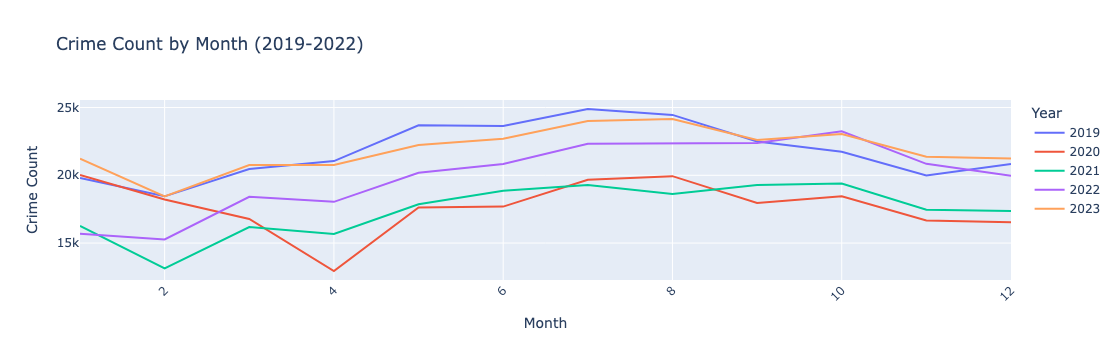

In [158]:
fig = px.line(grouped_df, 
              x='Month', y='count', color='Year',  title='Crime Count by Month (2019-2022)',
              labels={'Month': 'Month', 'count': 'Crime Count'})

# Customize the chart
fig.update_layout(xaxis_title='Month', yaxis_title='Crime Count',xaxis_tickangle=-45)

fig.show()

![title](3rd.png)

### Observations:
**The graph clearly showcases that, overall, the crime rate in 2020 was lower compared to the other four years.** 
This can be explained by considering that 2020 was the lockdown year with the highest number of COVID-19 cases. 

## Trends of Top 4 Crime Types over the years.

- The goal is to observe how the top 4 crime types have been changing over the last 5 years in Chicago. A line chart with separate lines for each crime type can be created for this analysis.
- The time window for this graph is selected to be 14 days to ensure smoothness in lines. 

In [173]:
# Counting the number of crimes committed in 15 15-day time period. 
grouped_df = df.groupby([pd.Grouper(key='Date', freq='15D'), 'Primary Type']).size().reset_index(name='Count')
grouped_df['Date_plus_15'] = grouped_df['Date'] + pd.Timedelta(days=14)
arange_columns=['Date','Date_plus_15','Primary Type','Count']  # top 4 crime types list 
grouped_df=grouped_df[arange_columns]  # Arranging columns 
grouped_df.rename(columns={'Date':'Start_Date','Date_plus_15':'End_date'},inplace=True) # renaming columns


# Removing null rows 
top_4=grouped_df[grouped_df['Primary Type'].isin(['THEFT','BATTERY','CRIMINAL DAMAGE','ASSAULT'])]

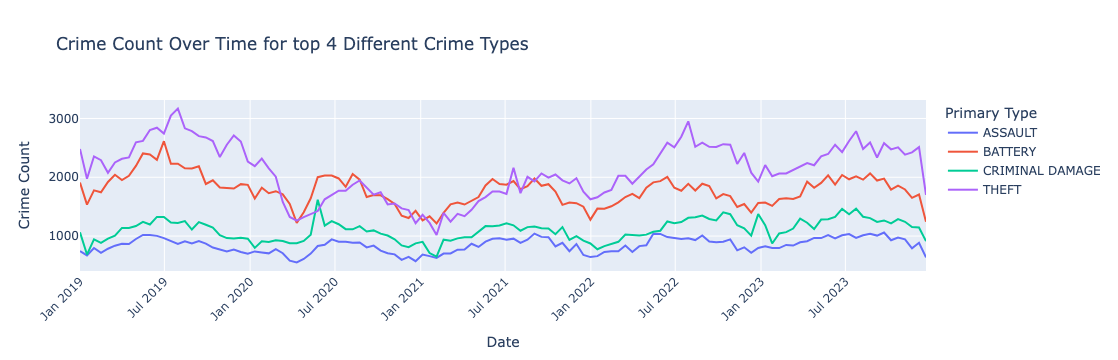

In [175]:
df_pivot = top_4.pivot(index='Start_Date', columns='Primary Type', values='Count').reset_index()

# Create a line chart
fig = px.line(df_pivot, x='Start_Date', y=df_pivot.columns[1:],  # All columns except 'Start_Date'
              labels={'value': 'Count', 'Start_Date': 'Date'},title='Crime Count Over Time for top 4 Different Crime Types')

# Customize the layout
fig.update_layout(xaxis_title='Date',yaxis_title='Crime Count',legend_title='Primary Type',xaxis_tickangle=-45
)
fig.show()

![title](4rth.png)

### Observations:
- The Top crimes showed same pattern as all crimes togather.
- The cylic nature of all 4 top crimes showed a decrese in the crime rate in winter and increase during summer.
- The year 2020 of COVID observed low crime rate for all 4 top crime types. 

# How time of the day is co-related with crime rate.  

In [182]:
df['Date_only'] = df['Date'].dt.strftime('%m/%d/%Y')  # Date in the format mm/dd/yyyy
df['Time_only'] = df['Date'].dt.strftime('%H:%M:%S') 


### Is time=00:00:00 used as default time?

In [184]:
random=['00:00:00','01:28:00','00:00:13','00:13:15','12:45:03','09:20:10']
times = pd.to_datetime(random, format='%H:%M:%S').time
for i in times:
    count=(df['Time_only']==str(i)).sum()
    print(f'{i} : {count}')
    


00:00:00 : 37827
01:28:00 : 268
00:00:13 : 0
00:13:15 : 0
12:45:03 : 0
09:20:10 : 0


As the results show, the `second parameter` is not the time parameter that was being tracked.

In [193]:
random=['00:00:00','02:00:00','11:00:00','05:13:00','12:45:00','09:20:00']
times = pd.to_datetime(random, format='%H:%M:%S').time
for i in times:
    count=(df['Time_only']==str(i)).sum()
    print(f'{i} : {count}')

00:00:00 : 37827
02:00:00 : 10146
11:00:00 : 14632
05:13:00 : 104
12:45:00 : 2628
09:20:00 : 1353


Another thing to note here is **Minutes** are considered for collecting crime data but mostly the hour of the day that is more signficat.  
That why we see small numbers of rows for time where minutes are specified compared to times where minutes and seconds are zero and only **Hour** has some non_zero value.

Now lets see if **00:00:00** is default value.

In [195]:
random=['00:00:00','01:00:00','05:00:00','12:00:00','16:00:00','23:00:00']
times = pd.to_datetime(random, format='%H:%M:%S').time
for i in times:
    count=(df['Time_only']==str(i)).sum()
    print(f'{i} : {count}')

00:00:00 : 37827
01:00:00 : 11206
05:00:00 : 5823
12:00:00 : 30905
16:00:00 : 18865
23:00:00 : 14032


#### With such a Large number of rows for time where Minutes and Seconds are ZERO, we can conclude that **00:00:00** IS NOT considered default value. 

In [197]:
df['Hour'] = pd.to_datetime(df['Time_only'].astype(str), format='%H:%M:%S').dt.hour

# Group by the Hour column and count the number of rows for each hour period
hourly_counts = df.groupby('Hour').size().reset_index(name='Count')

hourly_counts.columns

Index(['Hour', 'Count'], dtype='object')

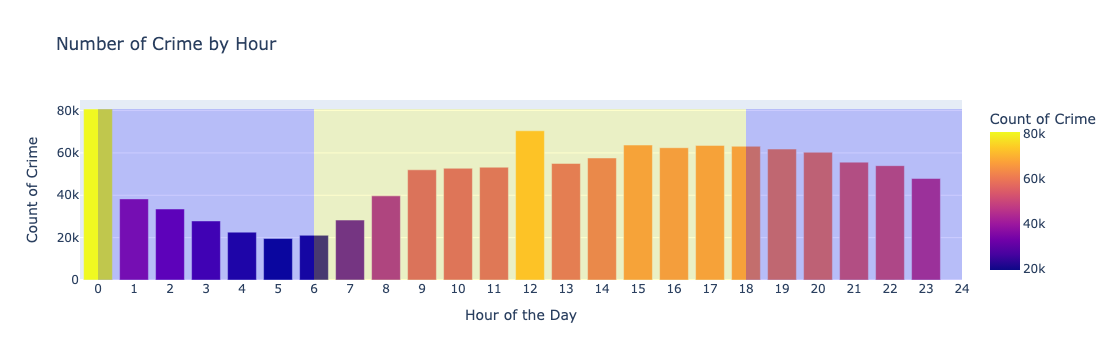

In [199]:
fig = px.bar(hourly_counts, x='Hour', y='Count', title='Number of Crime by Hour', labels={'Hour': 'Hour of the Day', 'Count': 'Count of Crime'},
             color='Count', color_continuous_scale=px.colors.sequential.Plasma)

# Add daytime and nighttime background
fig.update_layout(shapes=[
        # Daytime rectangle
        dict(type='rect', x0=6, x1=18, y0=0, y1=hourly_counts['Count'].max(),
             fillcolor='rgba(255, 255, 0, 0.2)', line=dict(width=0)),  # Light yellow for daytime
        # Nighttime rectangle
        dict(type='rect', x0=18, x1=24, y0=0, y1=hourly_counts['Count'].max(),
             fillcolor='rgba(0, 0, 255, 0.2)', line=dict(width=0)),  # Light blue for nighttime
        dict(type='rect', x0=0, x1=6, y0=0, y1=hourly_counts['Count'].max(),
             fillcolor='rgba(0, 0, 255, 0.2)', line=dict(width=0))   # Light blue for nighttime
    ]  
)

fig.update_layout(xaxis=dict(tickmode='linear'))  # Ensure all hours are shown on x-axis
fig.show()


![title](5th.png)

### Observations

- **Higher Crime Rate in Evening and Night**: Crime rates tend to be higher during the evening and early night hours.
- **Outliers at 12 PM and 12 AM**: Noon (12 PM) and midnight (12 AM) show unusual spikes in the dataset.
- **Lowest Crime in Early Morning**: Crime rates are at their lowest between 3 AM and 7 AM.

## Conclusion

- **Top Crimes**: Over the past five years, the most frequently reported crimes are **THEFT, BATTERY, CRIMINAL DAMAGE,** and **ASSAULT**, showing consistent trends each year. Less common crimes such as **RITUALISM, HUMAN TRAFFICKING, KIDNAPPING, INTIMIDATION,** and **GAMBLING** are present but in very low numbers.
- **Seasonal Crime Trends**: Crime rates generally follow a seasonal pattern, increasing in the summer and decreasing in the winter. This trend holds for all years except 2020, where crime patterns were disrupted by the COVID-19 lockdowns, leading to a notable reduction in crime overall.
- **Time-of-Day Patterns**: Crime activity is highest in the evening and early night hours, with lower activity in the early morning between 3 AM and 7 AM. Spikes at 12 PM (noon) and 12 AM (midnight) suggest potential outliers, which may be due to reporting inconsistencies or unique social factors associated with these times.



For time analysis of crime, one of the patterns that stands out is the cyclicalnature of crime, with rates increasing in the summer months and decreasing during the winter. This seasonal trend is visible across all years except for 2020, where the data lacks the typical symmetry due to the impact of the COVID-19 lockdowns, which drastically reduced overall crime rates. This likely has a practical explanation with the summertime providing longer daylight hours and warmer temperatures, making it easier for everyone, including those involved in crime, to be out and about. 
Beyond seasonal patterns, we were able to get more granular and see the data  alsosuggestst crime is more frequent in the evening and early night hours likely when people are commuting home from work or out for the evening. We see thee lowest activity between 3 AM and 7 A (sleep time for a large majority of the population)M.Midday (12 PM)  andmidnight ( 12 A) appear to  stand out a  outliers, possibly due to reporting anomalies ortheir use as 'defaulted' times when a time may not have been available..

## Next Steps
If this project could be expanded, the next steps could be to apply comparable crime analysis to another cities within North America. The team had identified Toronto as a likely candidate due to its proximity spatially to Chicago and its closely comparable population size. Another potential path forward could be to work with the team that did the analysis on Calgary Crime data and determine if there are any interesting contrasts or comparasions. 

As well, it appears that many crime datasets contain some kind of indication for 'domestic' crime (usually a boolean or a classification). It is also an area of growth to look deeper into this classification. What makes a crime 'domestic'? Why do most police forces use this attribution? What, if anything, can be observed for the crime rates, arrest rates, geospatial distribution and timings of these crimes?